- Se creará una función que genere un "sub- conjunto de datos"  de digits con solo dos clases. El criterio de elección de los dos dígitos que formaran el nuevo  "sub- conjunto de datos" se hará mediante parámetros o aleatoriamente. 


- El modelo de regresión logística se entrenará con el subconjunto de datos generados mediante la metodología de la regla 60-20-20 y/o k-fold cross. 


- El rendimiento se describirá en términos del valor de  la función  de coste J  ("loss")  y en términos de exactitud ("accuracy").


Exactitud = número de casos con una predicción de clase correcta /  número de casos posibles.


### Librerías

In [1]:
import pandas as pd
import math
import random
import os
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from tqdm import tqdm
import math as m
import random as rd
%matplotlib inline

### Base de datos

In [2]:
dataset = pd.read_csv('./codificado_noindex.csv')
dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,3,0,1,0,0,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,5,0,0,0,0,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,0,0,1,0,3,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,7,0,0,1,1,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,9,0,0,0,0,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,1,1,1,1,3,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,10,1,0,0,0,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,6,1,0,0,1,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,12,1,0,1,1,12.0,0,0,0


In [3]:
datos = dataset.copy()

<AxesSubplot:>

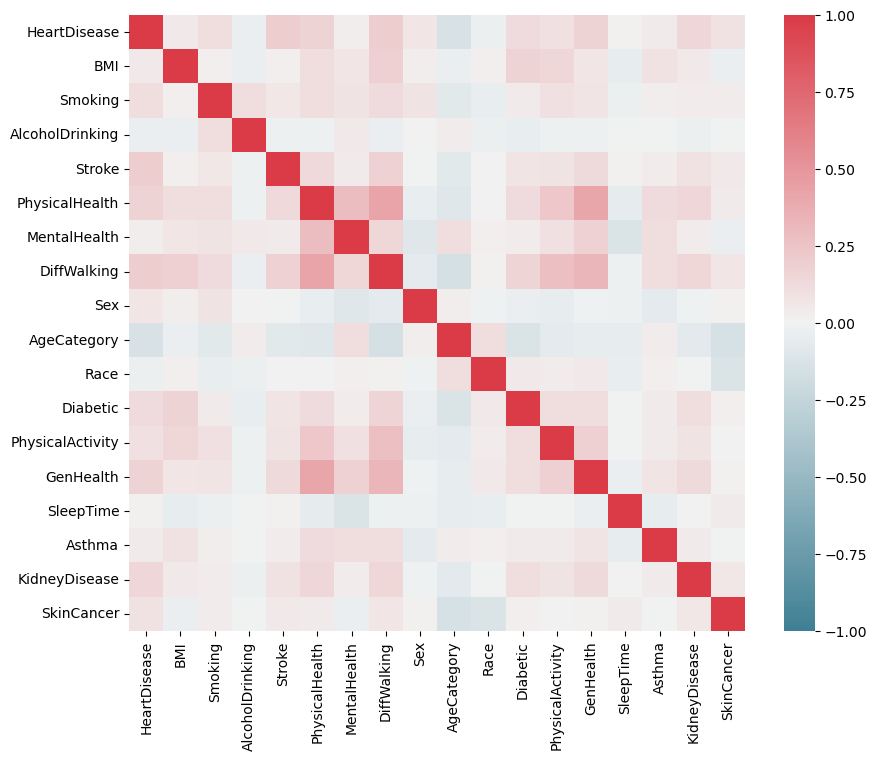

In [4]:
f, ax = plt.subplots(figsize=(10, 8))
corr = datos.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Porcentaje de valores faltantes

In [5]:
def valores_faltantes(dataset):
    missing_values_count = dataset.isnull().sum()
    total_missing = missing_values_count.sum() 
    #Porcentaje de datos faltantes
    total_missing_porcent = total_missing/(np.product(dataset.shape))*100
    print('Porcentaje total de valores faltantes:',total_missing_porcent,'%')
    print('')
    print('Porcentaje de valores faltantes de cada atributo:')
    for col in dataset.columns:
        VP_missing = np.mean(dataset[col].isnull())
        print('{} - {}%'.format(col,round(VP_missing*100)))  

In [6]:
valores_faltantes(datos)

Porcentaje total de valores faltantes: 0.0 %

Porcentaje de valores faltantes de cada atributo:
HeartDisease - 0%
BMI - 0%
Smoking - 0%
AlcoholDrinking - 0%
Stroke - 0%
PhysicalHealth - 0%
MentalHealth - 0%
DiffWalking - 0%
Sex - 0%
AgeCategory - 0%
Race - 0%
Diabetic - 0%
PhysicalActivity - 0%
GenHealth - 0%
SleepTime - 0%
Asthma - 0%
KidneyDisease - 0%
SkinCancer - 0%


Identificación de outliers

<AxesSubplot:>

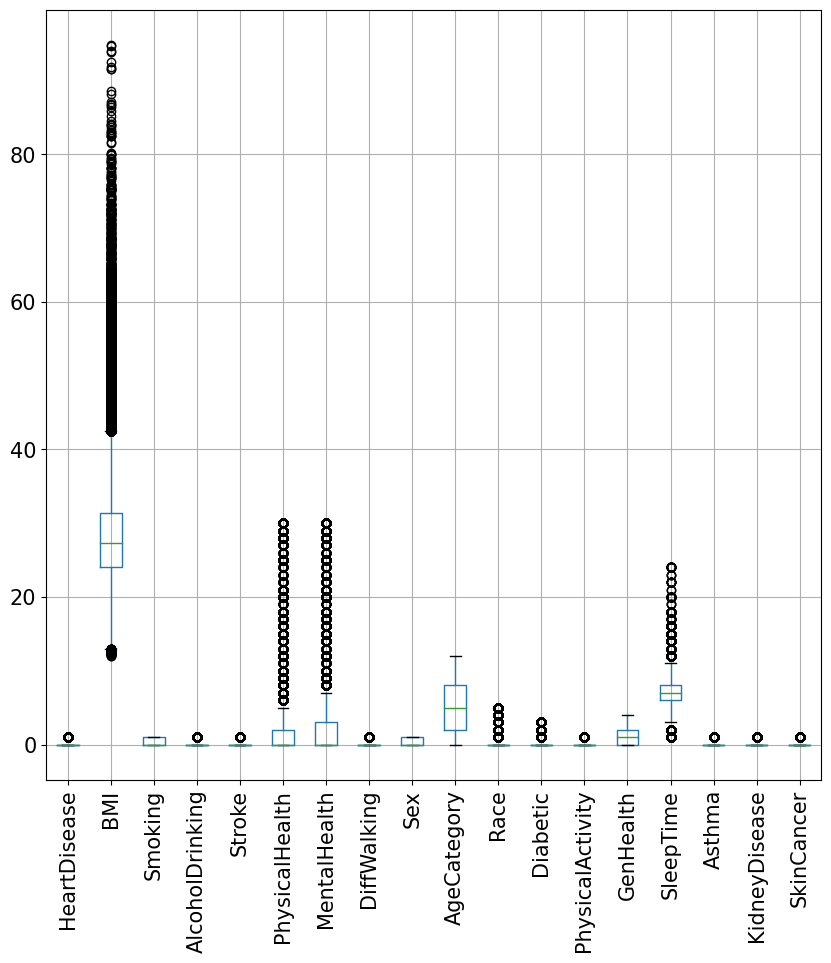

In [7]:
datos.boxplot(rot=90, fontsize=15,figsize = (10,10))

Renombramiento de los index

In [8]:
d =pd.DataFrame(datos)
d = d.reset_index()
d = d.drop(['index'],axis=1) #Eliminando el atributo de index
d

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,3,0,1,0,0,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,5,0,0,0,0,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,0,0,1,0,3,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,7,0,0,1,1,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,9,0,0,0,0,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,1,1,1,1,3,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,10,1,0,0,0,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,6,1,0,0,1,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,12,1,0,1,1,12.0,0,0,0


Normalización de los datos

In [9]:
def norm_min_max(datos):
    lim_sup = []
    lim_inf = []
    rangoDatos =[]
    maxNorm = 1
    minNorm = 0
    rango = maxNorm - minNorm
    for i in range (0,datos.columns.size):
        lim_sup.append(datos.iloc[:,i].max())
        lim_inf.append(datos.iloc[:,i].min())
        rangoDatos.append(lim_sup[i] - lim_inf[i])
    nombres = datos.columns.values.tolist()
    datosNorm = pd.DataFrame(columns = nombres)

    for j in range(len(datos.columns)):
        varNorm = []
        var = datos.iloc[:,j]
        for i in range(len(datos)):
            D = var[i] - lim_inf[j]
            DPct = D/rangoDatos[j]
            dNorm = rango*DPct
            varNorm.append(minNorm+dNorm)
        datosNorm.iloc[:,j] = varNorm
    datos = datosNorm
    return datos

In [10]:
d_S = d.loc[:,['BMI','PhysicalHealth','MentalHealth','AgeCategory','Race','Diabetic','GenHealth','SleepTime']]
CD_S = d.loc[:,['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']]
datos_norm = norm_min_max(d_S)
datos_norm = pd.concat([datos_norm, CD_S], axis=1)
datos_norm

C:\Users\gaby9\AppData\Local\Temp\ipykernel_13268\1809094097.py:23: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  datosNorm.iloc[:,j] = varNorm


,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0.055294,0.100000,1.0,0.250000,0.0,0.333333,0.00,0.173913,0,1,0,0,0,0,0,1,0,1
1,0.100447,0.000000,0.0,0.416667,0.0,0.000000,0.00,0.260870,0,0,0,1,0,0,0,0,0,0
2,0.175782,0.666667,1.0,0.000000,0.0,0.333333,0.75,0.304348,0,1,0,0,0,1,0,1,0,0
3,0.147169,0.000000,0.0,0.583333,0.0,0.000000,0.25,0.217391,0,0,0,0,0,0,1,0,0,1
4,0.141132,0.933333,0.0,0.750000,0.0,0.000000,0.00,0.304348,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.185802,0.233333,0.0,0.083333,0.2,0.333333,0.75,0.217391,1,1,0,0,1,1,1,1,0,0
319791,0.215139,0.000000,0.0,0.833333,0.2,0.000000,0.00,0.173913,0,1,0,0,0,1,0,1,0,0
319792,0.147531,0.000000,0.0,0.500000,0.2,0.000000,0.25,0.217391,0,0,0,0,0,0,0,0,0,0
319793,0.250996,0.000000,0.0,1.000000,0.2,0.000000,0.25,0.478261,0,0,0,0,0,0,1,0,0,0


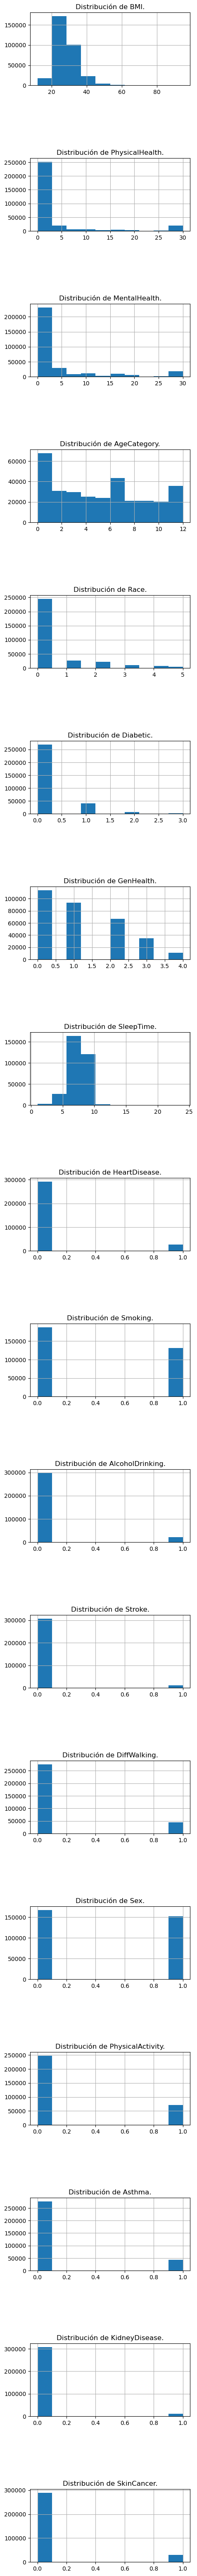

In [11]:
columnas = datos_norm.columns.values
fig, axs = plt.subplots(dataset.shape[1], 1, figsize = (5,80))
plt.subplots_adjust(hspace = 1)
for i, c in enumerate(columnas):
    dist_datos = dataset[c]
    axs[i].set_title(f'Distribución de {c}.')
    axs[i].hist(dist_datos)
    axs[i].grid(True)

### Reducción de dimensionalidad (PCA)

In [12]:
def matriz_cov(data):
    atributos = data.columns 
    n = len(atributos)
    m = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            X = data[atributos[i]]
            Y = data[atributos[j]]
            m[i][j] = (((X-X.mean())*(Y-Y.mean())).sum())/(len(X)-1)
    return m

In [13]:
def PCA(datos,col_decision):
    datos1 = datos.drop([col_decision],axis=1) #Eliminando el atributo de decisión 
    #Ajustar los datos restando la media a cada atributo
    datos_A = pd.DataFrame(columns=datos1.columns,index=range(len(datos1)))
    for i in datos_A.columns:
        datos_A[i] = datos1[i] - datos1[i].mean()    
    #datos_A  
    matrix = matriz_cov(datos_A)  
    #sns.heatmap(matrix)  
    L,V =  np.linalg.eig(matrix)  
    #Obtener el porcentaje de covarianza de cada uno de los atributos
    total = L.sum()
    p = (L/total)*100
    pca =[]
    columnas1 = datos_A.columns.values
    for index, row in enumerate(p):
        print(columnas1[index] + ':',row)  

In [14]:
col_decision = 'HeartDisease'
PCA(datos_norm,col_decision)

BMI: 18.165678204395867
PhysicalHealth: 17.275889756499645
MentalHealth: 12.486594677591599
AgeCategory: 8.301896253289346
Race: 7.673252515623971
Diabetic: 6.482693622517152
GenHealth: 0.3560181651463432
SleepTime: 0.24836646086942993
Smoking: 5.071112467361624
AlcoholDrinking: 4.3679920481392545
Stroke: 4.093876485057074
DiffWalking: 3.7428363350887923
Sex: 1.6669949549302847
PhysicalActivity: 3.057187175496456
Asthma: 2.1384379386193144
KidneyDisease: 2.52953953049109
SkinCancer: 2.3416334088827635


In [15]:
datos_PCA = datos_norm.loc[:,['HeartDisease','BMI','PhysicalHealth','MentalHealth','AgeCategory','Race','Diabetic','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity']]
datos_PCA

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity
0,0,0.055294,0.100000,1.0,0.250000,0.0,0.333333,1,0,0,0,0
1,0,0.100447,0.000000,0.0,0.416667,0.0,0.000000,0,0,1,0,0
2,0,0.175782,0.666667,1.0,0.000000,0.0,0.333333,1,0,0,0,0
3,0,0.147169,0.000000,0.0,0.583333,0.0,0.000000,0,0,0,0,1
4,0,0.141132,0.933333,0.0,0.750000,0.0,0.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0.185802,0.233333,0.0,0.083333,0.2,0.333333,1,0,0,1,1
319791,0,0.215139,0.000000,0.0,0.833333,0.2,0.000000,1,0,0,0,0
319792,0,0.147531,0.000000,0.0,0.500000,0.2,0.000000,0,0,0,0,0
319793,0,0.250996,0.000000,0.0,1.000000,0.2,0.000000,0,0,0,0,1


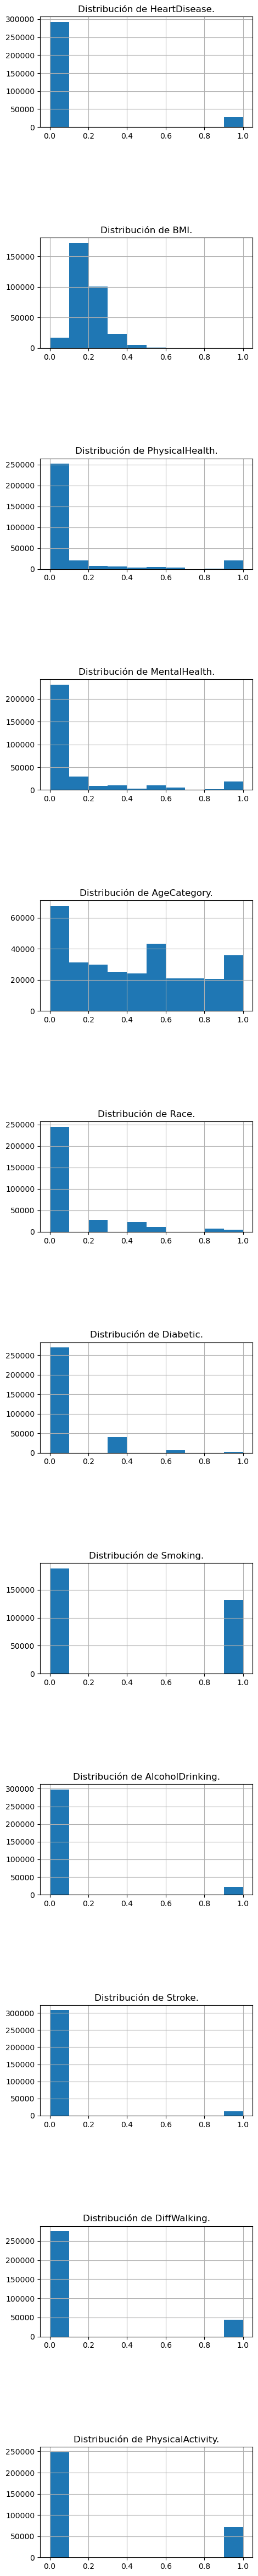

In [16]:
data_ = datos_PCA
columnas = data_.columns.values
fig, axs = plt.subplots(data_.shape[1], 1, figsize = (5,60))
plt.subplots_adjust(hspace = 1)
for i, c in enumerate(columnas):
    dist_datos = data_[c]
    axs[i].set_title(f'Distribución de {c}.')
    axs[i].hist(dist_datos)
    axs[i].grid(True)

### Preparar

Divisón de los conjuntos de entrenamiento, validación y prueba

In [17]:
def method_602020(x,y):
    train_x = x[0 : int(len(x)*0.6)]
    train_y = y[0 : int(len(y)*0.6)]
    val_x = x[int(len(x)*0.6) : int(len(x)*0.8)]
    val_y = y[int(len(y)*0.6) : int(len(y)*0.8)]
    test_x = x[int(len(x)*0.8) : ]
    test_y = y[int(len(y)*0.8) : ]
    return train_x, train_y, val_x, val_y, test_x, test_y

In [18]:
y = datos_PCA['HeartDisease']
x = datos_PCA.loc[:,['BMI','PhysicalHealth']]

In [19]:
x = np.array(x)
x.shape

(319795, 2)

In [20]:
y = np.expand_dims(y,axis = 1)
y.shape

(319795, 1)

In [21]:
train_x, train_y, val_x, val_y, test_x, test_y = method_602020(x,y)

In [22]:
print('Conjunto de entrenamiento:',len(train_x))
print('Conjunto de validación:',len(val_x))
print('Conjunto de prueba:',len(test_x))

Conjunto de entrenamiento: 191877
Conjunto de validación: 63959
Conjunto de prueba: 63959


### Regresión Logísitca

Entrenamiento

In [23]:
def regre_logist(x, y, theta, alpha, epocas,tolerance):
    iterations = 1
    for i in tqdm(range(epocas)):
        Z = np.dot(x,theta)
        ft = 1 / (1 + np.exp(-Z))
        dJ = (1/len(x)) * np.dot(np.transpose(x),(ft - y))
        mse.append(MSE(x, y, theta))
        vc.append(cross_entropy(x, y, theta))
        new_theta = theta - alpha * dJ
        #n_theta = [item for lista in new_theta for item in lista]
        it.append(iterations)
        # Stopping Condition
        if np.sum(abs(new_theta - theta)) < tolerance:
            print('Gradient Descent has converged')
            break    
        iterations += 1
        theta = new_theta    
    return theta, it,mse,vc

In [24]:
def clasificacion(x,theta):
    Z = np.dot(x,theta)
    ft = 1 / (1 + np.exp(-Z))
    clas = np.round(ft)
    return clas

In [25]:
def accuracy(ycalculada, yreal):
    coincidencias = np.equal(ycalculada, yreal)
    totalcoin = np.sum(coincidencias)
    porcentaje = (totalcoin/len(ycalculada))*100
    return porcentaje

In [26]:
def MSE(x, y, theta):
    h = np.dot(x,theta)
    J = np.sum((h-y)**2)/(2 * (len(h)))
    return J

In [27]:
def cross_entropy(x, y, theta):
    z = np.dot(x,theta)
    p = 1 / (1 + np.exp(-z))
    J = - np.mean(y*np.log(p) + (1-y)*np.log(1-p)) #Cross-entropy cost function
    return J

#### alpha:0.6, épocas:100

In [28]:
alpha = 0.6
epocas = 100
theta = (np.random.rand(x.shape[1],1))
#print(theta)
it = []
mse = []
vc =[]
tolerance = 1e-3 
print(theta)
print('')
theta_f,it,mse,vc = regre_logist(train_x, train_y, theta, alpha, epocas,tolerance)

[[0.45098448]
 [0.4380119 ]]



100%|██████████| 100/100 [00:02<00:00, 43.90it/s]


Text(0, 0.5, 'MSE')

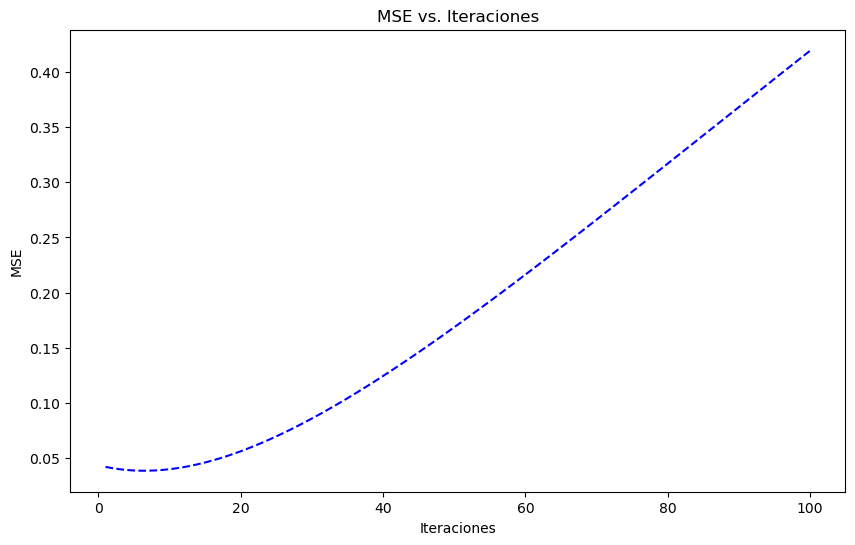

In [29]:
plt.figure(figsize=(10,6))
plt.plot(it,mse,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('MSE vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')

Text(0, 0.5, 'Cross entropy')

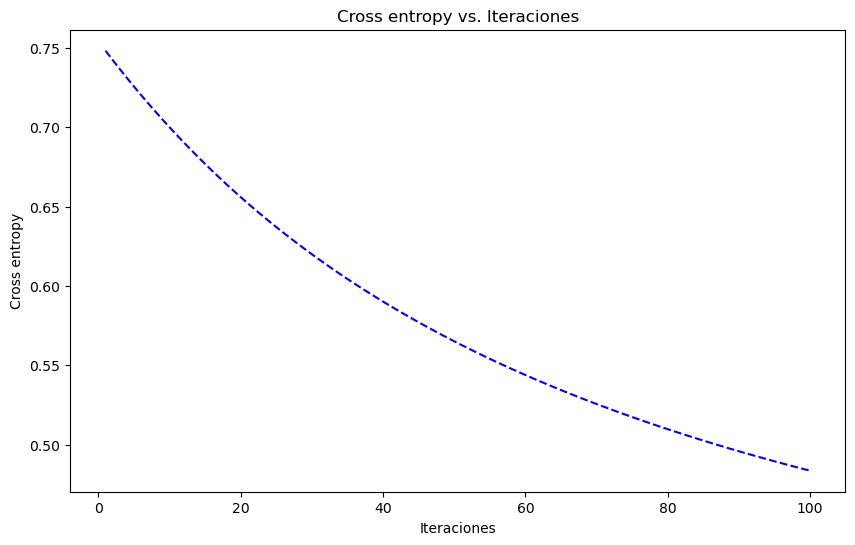

In [30]:
plt.figure(figsize=(10,6))
plt.plot(it,vc,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('Cross entropy vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Cross entropy')

#### Validación

In [31]:
ycalculada = clasificacion(val_x, theta_f)
print('Exactitud Validación:',accuracy(ycalculada, val_y))
loss = MSE(val_x, ycalculada, theta_f)
print('MSE:',loss)
loss = cross_entropy(val_x, ycalculada, theta_f)
print('Cross entropy:',loss)

Exactitud Validación: 91.29285948810957
MSE: 0.3094033110510188
Cross entropy: 0.40846008117080457


#### Prueba

In [32]:
yfinal = clasificacion(test_x, theta_f)
accuracy_final = accuracy(yfinal, test_y)
print('Exactitud de test:',accuracy_final)
loss = MSE(test_x, yfinal, theta_f)
print('MSE:',loss)
loss = cross_entropy(test_x, yfinal, theta_f)
print('Cross entropy:',loss)

Exactitud de test: 91.57585328100815
MSE: 0.3135916586864497
Cross entropy: 0.4069979802385159


#### alpha:0.3, épocas:100

In [33]:
alpha = 0.3
epocas = 100
theta = (np.random.rand(x.shape[1],1))
#print(theta)
it = []
mse = []
vc = []
tolerance = 1e-3 
print(theta)
print('')
theta_f,it,mse,vc = regre_logist(train_x, train_y, theta, alpha, epocas,tolerance)

[[0.39939602]
 [0.12393693]]



100%|██████████| 100/100 [00:02<00:00, 40.31it/s]


Text(0, 0.5, 'MSE')

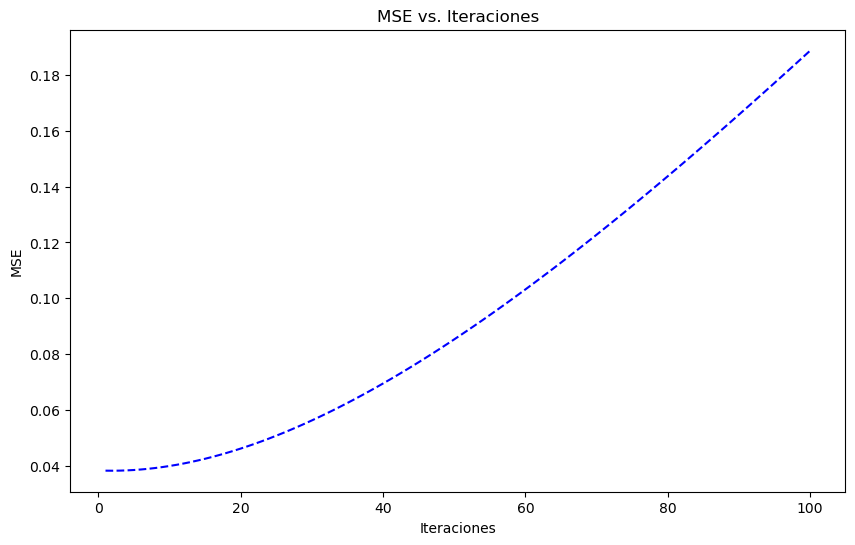

In [34]:
plt.figure(figsize=(10,6))
plt.plot(it,mse,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('MSE vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')

Text(0, 0.5, 'Cross entropy')

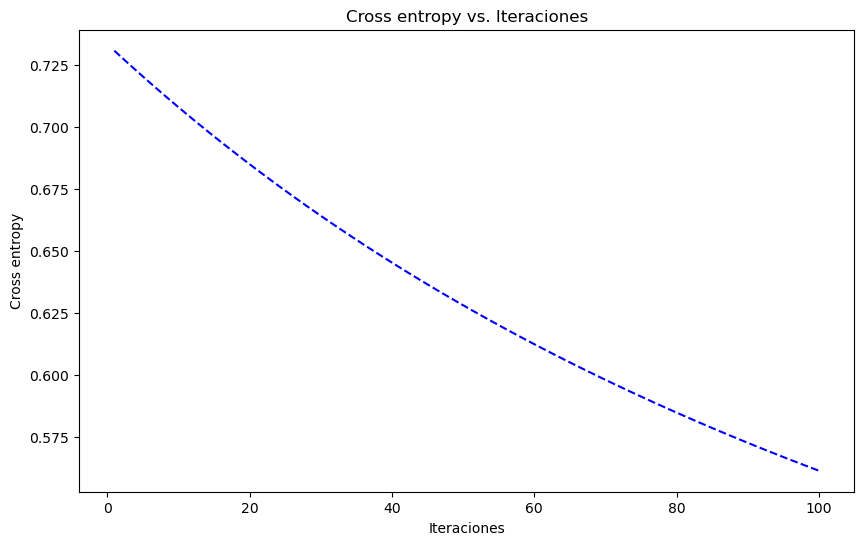

In [35]:
plt.figure(figsize=(10,6))
plt.plot(it,vc,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('Cross entropy vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Cross entropy')

#### Validación

In [36]:
ycalculada = clasificacion(val_x, theta_f)
print('Exactitud Validación:',accuracy(ycalculada, val_y))
loss = MSE(val_x, ycalculada, theta_f)
print('MSE:',loss)
loss = cross_entropy(val_x, ycalculada, theta_f)
print('Cross entropy:',loss)

Exactitud Validación: 91.29285948810957
MSE: 0.10506832006683893
Cross entropy: 0.5162284751767522


#### Prueba

In [37]:
yfinal = clasificacion(test_x, theta_f)
accuracy_final = accuracy(yfinal, test_y)
print('Exactitud de test:',accuracy_final)
loss = MSE(test_x, yfinal, theta_f)
print('MSE:',loss)
loss = cross_entropy(test_x, yfinal, theta_f)
print('Cross entropy:',loss)

Exactitud de test: 91.57585328100815
MSE: 0.1069387428202324
Cross entropy: 0.514895965367791


#### alpha:0.01, épocas:100

In [38]:
alpha = 0.01
epocas = 100
theta = (np.random.rand(x.shape[1],1))
#print(theta)
it = []
mse = []
vc = []
tolerance = 1e-3 
print(theta)
print('')
theta_f,it,mse,vc = regre_logist(train_x, train_y, theta, alpha, epocas,tolerance)

[[0.73753016]
 [0.31898903]]



100%|██████████| 100/100 [00:02<00:00, 43.16it/s]


Text(0, 0.5, 'MSE')

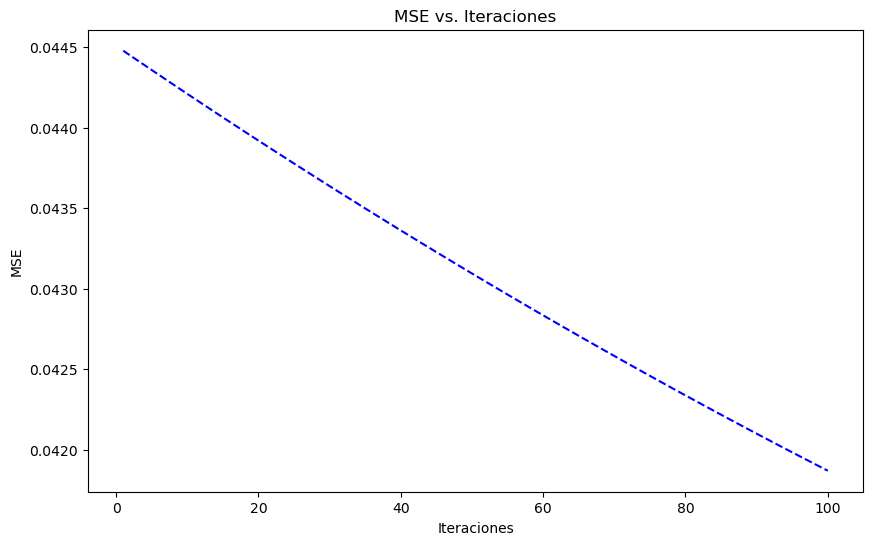

In [39]:
plt.figure(figsize=(10,6))
plt.plot(it,mse,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('MSE vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')

Text(0, 0.5, 'Cross entropy')

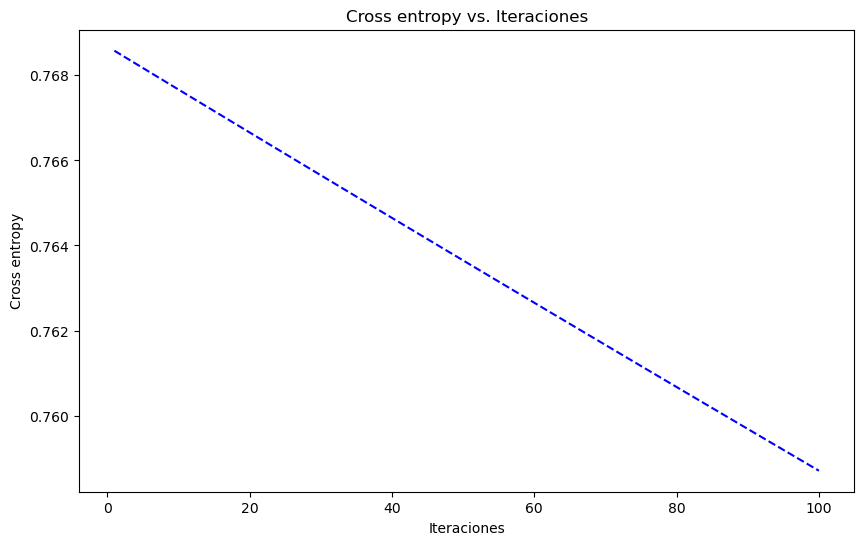

In [40]:
plt.figure(figsize=(10,6))
plt.plot(it,vc,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('Cross entropy vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Cross entropy')

#### Validación

In [41]:
ycalculada = clasificacion(val_x, theta_f)
print('Exactitud Validación:',accuracy(ycalculada, val_y))
loss = MSE(val_x, ycalculada, theta_f)
print('MSE:',loss)
loss = cross_entropy(val_x, ycalculada, theta_f)
print('Cross entropy:',loss)

Exactitud Validación: 8.70714051189043
MSE: 0.3583946308850899
Cross entropy: 0.618112650352154


#### Prueba

In [42]:
yfinal = clasificacion(test_x, theta_f)
accuracy_final = accuracy(yfinal, test_y)
print('Exactitud de test:',accuracy_final)
loss = MSE(test_x, yfinal, theta_f)
print('MSE:',loss)
loss = cross_entropy(test_x, yfinal, theta_f)
print('Cross entropy:',loss)

Exactitud de test: 8.424146718991853
MSE: 0.35714066039050746
Cross entropy: 0.6173995964851209


#### alpha=0.6, épocas=1000

In [43]:
alpha = 0.6
epocas = 1000
theta = (np.random.rand(x.shape[1],1))
#print(theta)
it = []
mse = []
vc = []
tolerance = 1e-3 
print(theta)
print('')
theta_f,it,mse,vc = regre_logist(train_x, train_y, theta, alpha, epocas,tolerance)

[[0.81890876]
 [0.88882332]]



100%|██████████| 1000/1000 [00:27<00:00, 36.61it/s]


Text(0, 0.5, 'MSE')

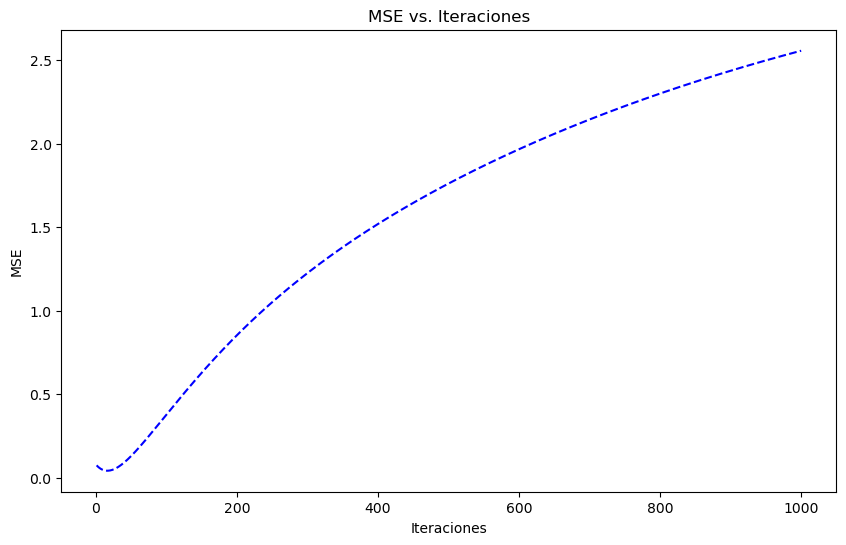

In [44]:
plt.figure(figsize=(10,6))
plt.plot(it,mse,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('MSE vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')

Text(0, 0.5, 'Cross entropy')

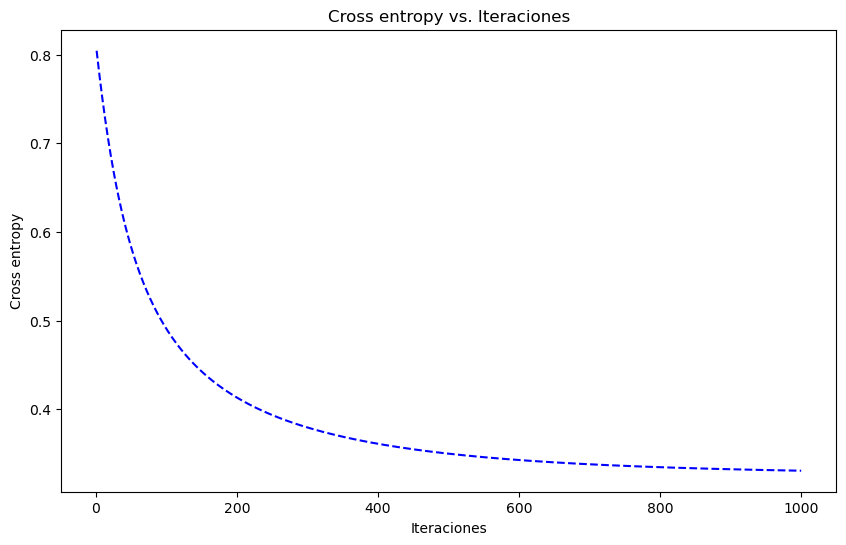

In [45]:
plt.figure(figsize=(10,6))
plt.plot(it,vc,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('Cross entropy vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Cross entropy')

#### Validación

In [46]:
ycalculada = clasificacion(val_x, theta_f)
print('Exactitud Validación:',accuracy(ycalculada, val_y))
print('MSE:',MSE(val_x, ycalculada, theta_f))
loss = cross_entropy(val_x, ycalculada, theta_f)
print('Cross entropy:',loss)

Exactitud Validación: 91.20686689910724
MSE: 2.3459482745148668
Cross entropy: 0.15670867857955073


#### Prueba

In [47]:
yfinal = clasificacion(test_x, theta_f)
print('Exactitud de test:',accuracy(yfinal, test_y))
print('MSE:',MSE(test_x, yfinal, theta_f))
loss = cross_entropy(test_x, yfinal, theta_f)
print('Cross entropy:',loss)

Exactitud de test: 91.49611469847872
MSE: 2.351468447395883
Cross entropy: 0.15663808485067776


#### alpha:0.3, épocas:1000

In [48]:
alpha = 0.3
epocas = 1000
theta = (np.random.rand(x.shape[1],1))
#print(theta)
it = []
mse = []
vc = []
tolerance = 1e-3 
print(theta)
print('')
theta_f,it,mse,vc = regre_logist(train_x, train_y, theta, alpha, epocas,tolerance)

[[0.60227944]
 [0.7886492 ]]



100%|██████████| 1000/1000 [00:27<00:00, 36.06it/s]


Text(0, 0.5, 'MSE')

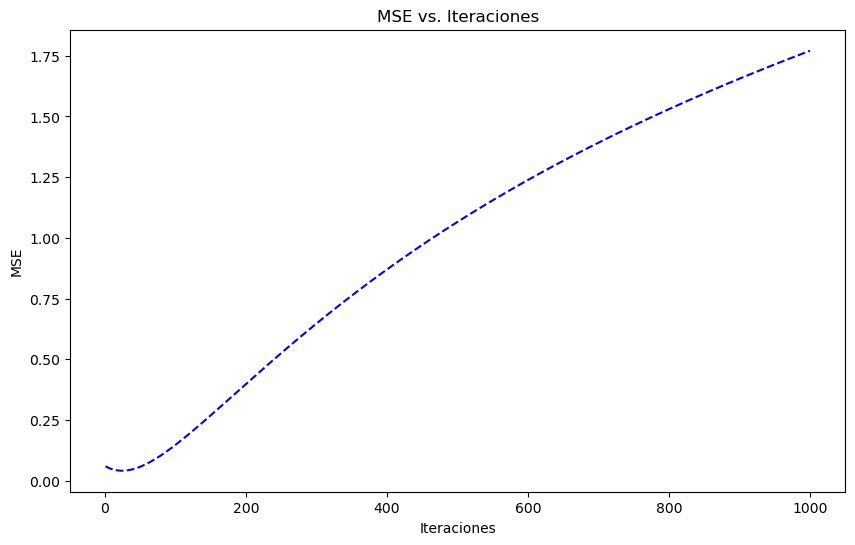

In [49]:
plt.figure(figsize=(10,6))
plt.plot(it,mse,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('MSE vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')

Text(0, 0.5, 'Cross entropy')

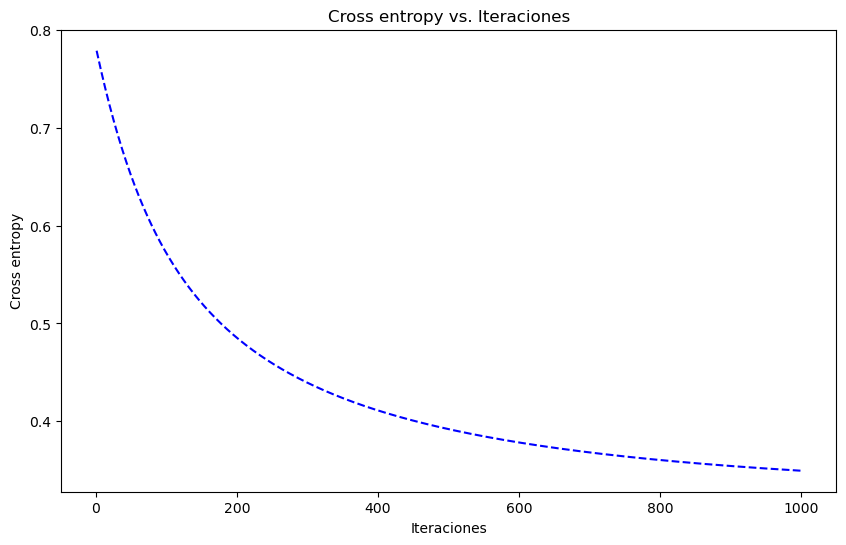

In [50]:
plt.figure(figsize=(10,6))
plt.plot(it,vc,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('Cross entropy vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Cross entropy')

#### Validación

In [51]:
ycalculada = clasificacion(val_x, theta_f)
print('Exactitud Validación:',accuracy(ycalculada, val_y))
loss = MSE(val_x, ycalculada, theta_f)
print('MSE:',loss)
loss = cross_entropy(val_x, ycalculada, theta_f)
print('Cross entropy:',loss)

Exactitud Validación: 91.29129598649135
MSE: 1.581325850857607
Cross entropy: 0.19883173606855145


#### Prueba

In [52]:
yfinal = clasificacion(test_x, theta_f)
accuracy_final = accuracy(yfinal, test_y)
print('Exactitud de test:',accuracy_final)
loss = MSE(test_x, yfinal, theta_f)
print('MSE:',loss)
loss = cross_entropy(test_x, yfinal, theta_f)
print('Cross entropy:',loss)

Exactitud de test: 91.57585328100815
MSE: 1.589056052742915
Cross entropy: 0.1981958333203356


#### alpha:0.01, épocas:1000

In [53]:
alpha = 0.01
epocas = 1000
theta = (np.random.rand(x.shape[1],1))
#print(theta)
it = []
mse = []
vc = []
tolerance = 1e-3 
print(theta)
print('')
theta_f,it,mse,vc = regre_logist(train_x, train_y, theta, alpha, epocas,tolerance)

[[0.50999526]
 [0.46507941]]



100%|██████████| 1000/1000 [00:28<00:00, 35.29it/s]


Text(0, 0.5, 'MSE')

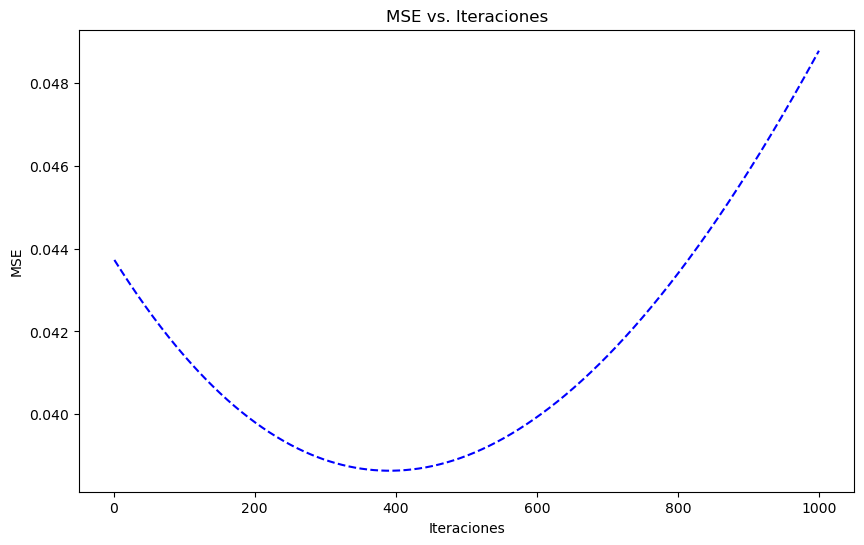

In [54]:
plt.figure(figsize=(10,6))
plt.plot(it,mse,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('MSE vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')

Text(0, 0.5, 'Cross entropy')

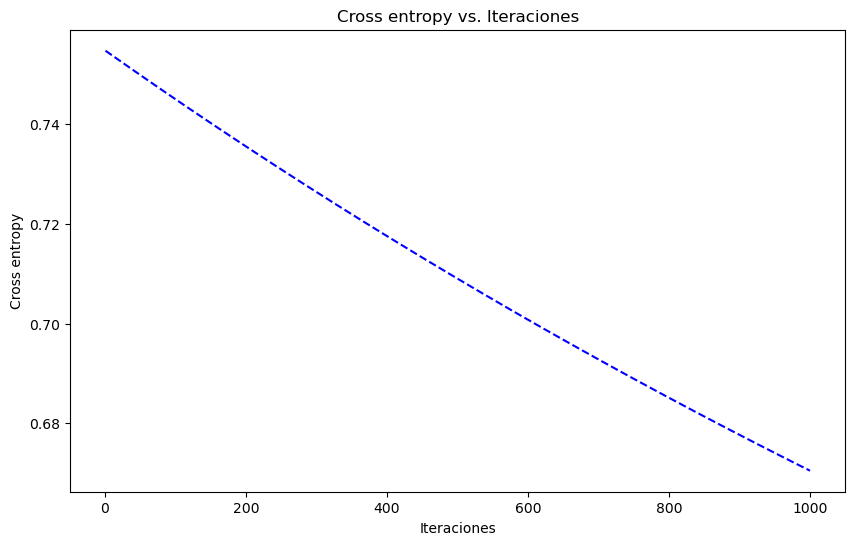

In [55]:
plt.figure(figsize=(10,6))
plt.plot(it,vc,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('Cross entropy vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Cross entropy')

#### Validación

In [56]:
ycalculada = clasificacion(val_x, theta_f)
print('Exactitud Validación:',accuracy(ycalculada, val_y))
loss = MSE(val_x, ycalculada, theta_f)
print('MSE:',loss)
loss = cross_entropy(val_x, ycalculada, theta_f)
print('Cross entropy:',loss)

Exactitud Validación: 88.52389812223456
MSE: 0.024715589922492634
Cross entropy: 0.6653604104788462


#### Prueba

In [57]:
yfinal = clasificacion(test_x, theta_f)
accuracy_final = accuracy(yfinal, test_y)
print('Exactitud de test:',accuracy_final)
loss = MSE(test_x, yfinal, theta_f)
print('MSE:',loss)
loss = cross_entropy(test_x, yfinal, theta_f)
print('Cross entropy:',loss)

Exactitud de test: 88.79438390218733
MSE: 0.02531437467528879
Cross entropy: 0.6654197667891997


#### alpha=0.6, épocas=10000

In [58]:
alpha = 0.6
epocas = 10000
theta = (np.random.rand(x.shape[1],1))
#print(theta)
it = []
mse = []
vc = []
tolerance = 1e-3 
print(theta)
print('')
theta_f,it,mse,vc = regre_logist(train_x, train_y, theta, alpha, epocas,tolerance)

[[0.12981364]
 [0.76966473]]



 19%|█▊        | 1868/10000 [00:55<04:00, 33.80it/s]

Gradient Descent has converged


Text(0, 0.5, 'MSE')

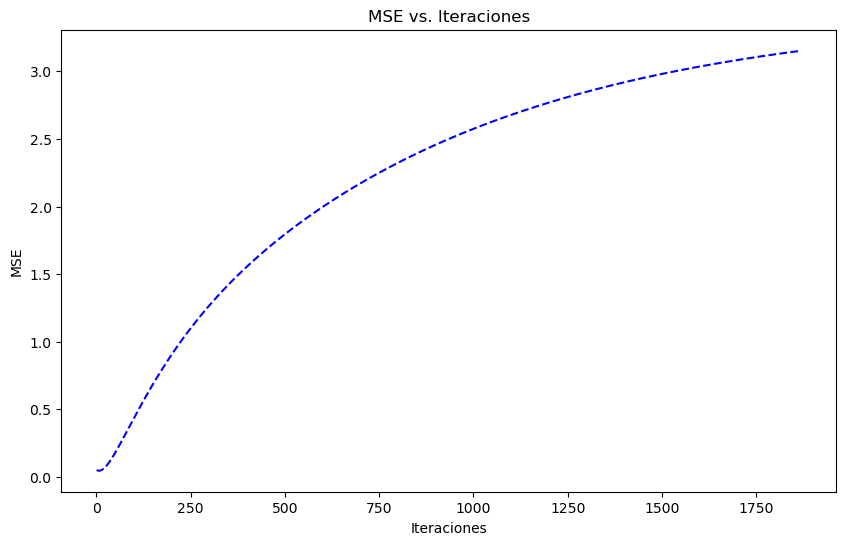

In [59]:
plt.figure(figsize=(10,6))
plt.plot(it,mse,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('MSE vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')

Text(0, 0.5, 'Cross entropy')

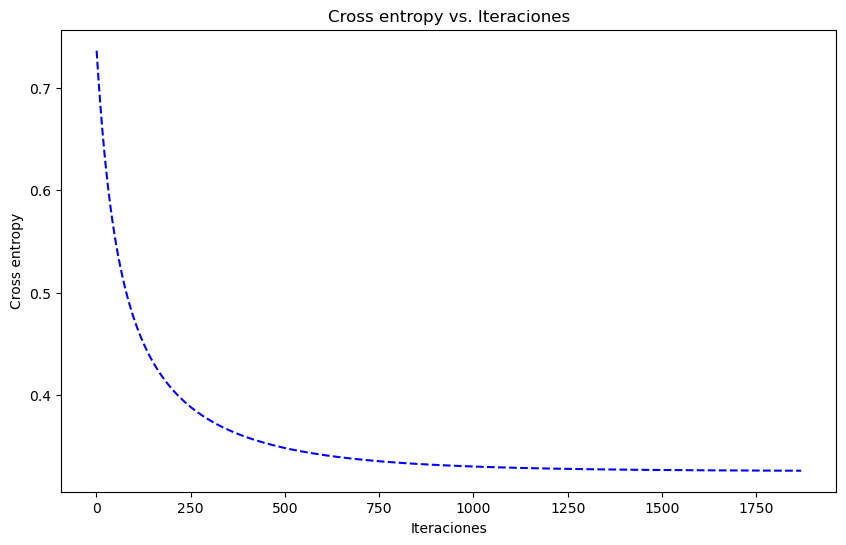

In [60]:
plt.figure(figsize=(10,6))
plt.plot(it,vc,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('Cross entropy vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Cross entropy')

#### Validación

In [61]:
ycalculada = clasificacion(val_x, theta_f)
print('Exactitud Validación:',accuracy(ycalculada, val_y))
print('MSE:',MSE(val_x, ycalculada, theta_f))
loss = cross_entropy(val_x, ycalculada, theta_f)
print('Cross entropy:',loss)

Exactitud Validación: 91.04113572757548
MSE: 2.9264133889318815
Cross entropy: 0.13605808094139604


#### Prueba

In [62]:
yfinal = clasificacion(test_x, theta_f)
print('Exactitud de test:',accuracy(yfinal, test_y))
print('MSE:',MSE(test_x, yfinal, theta_f))
loss = cross_entropy(test_x, yfinal, theta_f)
print('Cross entropy:',loss)

Exactitud de test: 91.35227254960209
MSE: 2.9306891712876983
Cross entropy: 0.1362359730391156


#### alpha:0.3, épocas:10000

In [63]:
alpha = 0.3
epocas = 10000
theta = (np.random.rand(x.shape[1],1))
#print(theta)
it = []
mse = []
vc = []
tolerance = 1e-3 
print(theta)
print('')
theta_f,it,mse,vc = regre_logist(train_x, train_y, theta, alpha, epocas,tolerance)

[[0.18485957]
 [0.30091083]]



 28%|██▊       | 2751/10000 [01:15<03:19, 36.30it/s]

Gradient Descent has converged


Text(0, 0.5, 'MSE')

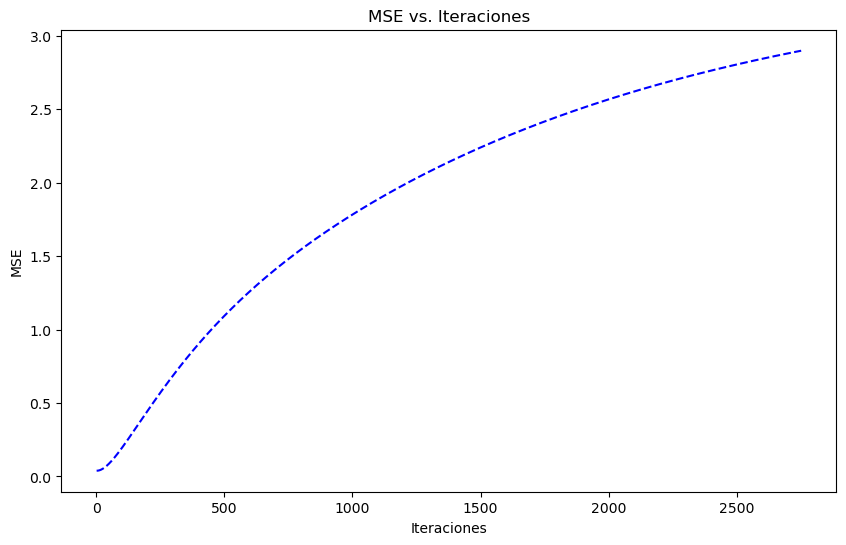

In [64]:
plt.figure(figsize=(10,6))
plt.plot(it,mse,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('MSE vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')

Text(0, 0.5, 'Cross entropy')

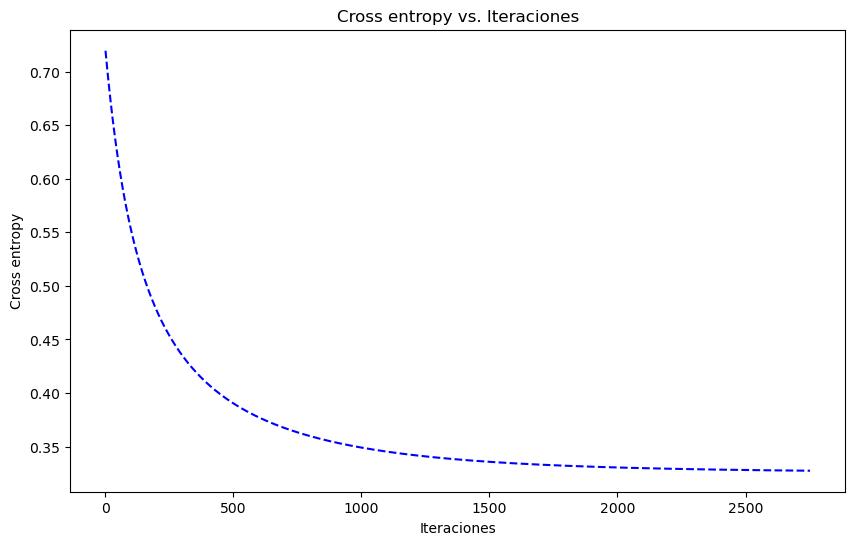

In [65]:
plt.figure(figsize=(10,6))
plt.plot(it,vc,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('Cross entropy vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Cross entropy')

#### Validación

In [66]:
ycalculada = clasificacion(val_x, theta_f)
print('Exactitud Validación:',accuracy(ycalculada, val_y))
loss = MSE(val_x, ycalculada, theta_f)
print('MSE:',loss)
loss = cross_entropy(val_x, ycalculada, theta_f)
print('Cross entropy:',loss)

Exactitud Validación: 91.11462030363201
MSE: 2.6775527035651536
Cross entropy: 0.14418180528992386


#### Prueba

In [67]:
yfinal = clasificacion(test_x, theta_f)
accuracy_final = accuracy(yfinal, test_y)
print('Exactitud de test:',accuracy_final)
loss = MSE(test_x, yfinal, theta_f)
print('MSE:',loss)
loss = cross_entropy(test_x, yfinal, theta_f)
print('Cross entropy:',loss)

Exactitud de test: 91.42263012242218
MSE: 2.6822181947191193
Cross entropy: 0.14426523812388764


#### alpha:0.01, épocas:10000

In [68]:
alpha = 0.01
epocas = 10000
theta = (np.random.rand(x.shape[1],1))
#print(theta)
it = []
mse = []
vc = []
tolerance = 1e-3 
print(theta)
print('')
theta_f,it,mse,vc = regre_logist(train_x, train_y, theta, alpha, epocas,tolerance)

[[0.09198163]
 [0.57659463]]



 13%|█▎        | 1332/10000 [00:38<04:08, 34.83it/s]

Gradient Descent has converged


Text(0, 0.5, 'MSE')

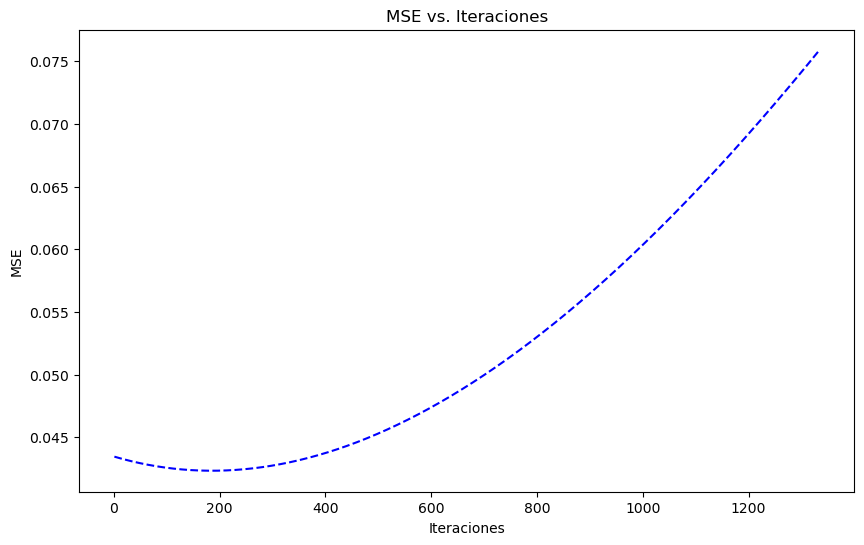

In [69]:
plt.figure(figsize=(10,6))
plt.plot(it,mse,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('MSE vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')

Text(0, 0.5, 'Cross entropy')

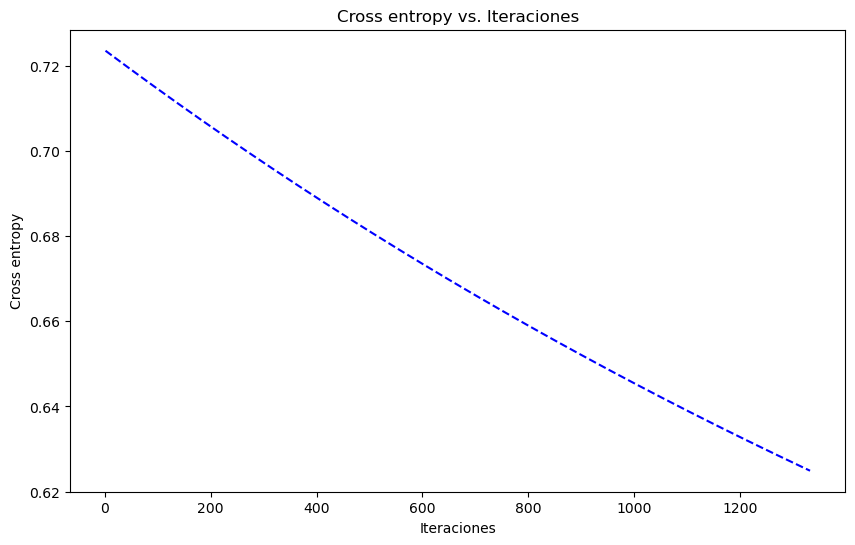

In [70]:
plt.figure(figsize=(10,6))
plt.plot(it,vc,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('Cross entropy vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Cross entropy')

#### Validación

In [71]:
ycalculada = clasificacion(val_x, theta_f)
print('Exactitud Validación:',accuracy(ycalculada, val_y))
loss = MSE(val_x, ycalculada, theta_f)
print('MSE:',loss)
loss = cross_entropy(val_x, ycalculada, theta_f)
print('Cross entropy:',loss)

Exactitud Validación: 91.11149330039557
MSE: 0.019577189286718463
Cross entropy: 0.6097895389555257


#### Prueba

In [72]:
yfinal = clasificacion(test_x, theta_f)
accuracy_final = accuracy(yfinal, test_y)
print('Exactitud de test:',accuracy_final)
loss = MSE(test_x, yfinal, theta_f)
print('MSE:',loss)
loss = cross_entropy(test_x, yfinal, theta_f)
print('Cross entropy:',loss)

Exactitud de test: 91.42419362404041
MSE: 0.01954416477706879
Cross entropy: 0.6097425260854216
